Import Packages needed 


In [1]:
import numpy as np

# Set up matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

from astropy.io import fits
from astropy.utils.data import download_file

import os
import glob
import time
from matplotlib.colors import LogNorm
from IPython import display
from IPython.display import clear_output
import random

plt.rcParams.update({'font.size':15})

Open up the reduced files 

In [2]:
image_list = []
n = 0

filepath =     "Data\\RZ_Cep\\Light\\Blue\\"


for file in glob.glob(filepath+"Reduced_star_Light_*.fits"): #The 'D' stops it picking up past master_frames
    image_list.append(file)
    n=n+1
print("\n".join(image_list))

Data\RZ_Cep\Light\Blue\Reduced_star_Light_Blue_30_secs_001.fits
Data\RZ_Cep\Light\Blue\Reduced_star_Light_Blue_30_secs_002.fits
Data\RZ_Cep\Light\Blue\Reduced_star_Light_Blue_30_secs_003.fits
Data\RZ_Cep\Light\Blue\Reduced_star_Light_Blue_30_secs_004.fits
Data\RZ_Cep\Light\Blue\Reduced_star_Light_Blue_30_secs_005.fits
Data\RZ_Cep\Light\Blue\Reduced_star_Light_Blue_30_secs_006.fits
Data\RZ_Cep\Light\Blue\Reduced_star_Light_Blue_30_secs_007.fits
Data\RZ_Cep\Light\Blue\Reduced_star_Light_Blue_30_secs_008.fits
Data\RZ_Cep\Light\Blue\Reduced_star_Light_Blue_30_secs_009.fits
Data\RZ_Cep\Light\Blue\Reduced_star_Light_Blue_30_secs_010.fits
Data\RZ_Cep\Light\Blue\Reduced_star_Light_Blue_30_secs_011.fits
Data\RZ_Cep\Light\Blue\Reduced_star_Light_Blue_30_secs_012.fits
Data\RZ_Cep\Light\Blue\Reduced_star_Light_Blue_30_secs_013.fits
Data\RZ_Cep\Light\Blue\Reduced_star_Light_Blue_30_secs_014.fits
Data\RZ_Cep\Light\Blue\Reduced_star_Light_Blue_30_secs_015.fits
Data\RZ_Cep\Light\Blue\Reduced_star_Ligh

Try plotting a light curve. This example uses preassigned coordiantes to plot the curve instead of finding the brightest pixel. 

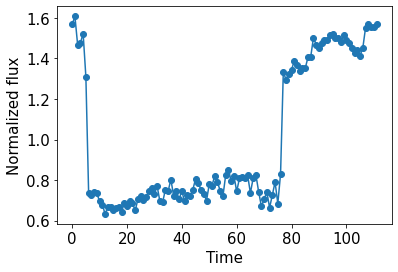

In [3]:
import numpy as np
import astropy.io.fits as fits
from photutils import aperture_photometry, CircularAperture
import matplotlib.pyplot as plt
import glob

# Define the filepath and search pattern for the reduced images
filepath = "Data/RZ_Cep/Light/Blue/"
search_pattern = "Reduced_star_Light_*.fits"

# Find the reduced images matching the search pattern
image_list = glob.glob(filepath + search_pattern)

# Load the reduced images
images = [fits.getdata(filename) for filename in image_list]

# Define the position of the variable star in the images
star_x, star_y = 100, 100

# Define the radius of the circular aperture for photometry
aperture_radius = 5

# Extract the flux data for the variable star from each image
fluxes = []
for image in images:
    aperture = CircularAperture((star_x, star_y), aperture_radius)
    phot_table = aperture_photometry(image, aperture)
    fluxes.append(phot_table['aperture_sum'][0])

# Normalize the flux data by dividing by a reference star
ref_flux = np.mean(fluxes)
normalized_fluxes = fluxes / ref_flux

# Plot the light curve
times = np.arange(len(normalized_fluxes))  # assuming equal time intervals between images
plt.plot(times, normalized_fluxes, 'o-')
plt.xlabel('Time')
plt.ylabel('Normalized flux')
plt.show()


In [4]:
import numpy as np
import astropy.io.fits as fits
from photutils import aperture_photometry, CircularAperture, detect_sources, source_properties
import matplotlib.pyplot as plt
import glob

# Define the filepath and search pattern for the reduced images
filepath = "Data/RZ_Cep/Light/Blue/"
search_pattern = "Reduced_star_Light_*.fits"

# Find the reduced images matching the search pattern
image_list = glob.glob(filepath + search_pattern)

# Load the reduced images
images = [fits.getdata(filename) for filename in image_list]

N_images = np.shape(images)
image_min = np.zeros(N_images[0])
image_max = np.zeros(N_images[0])
image_mean = np.zeros(N_images[0])
image_median = np.zeros(N_images[0])
image_stdev = np.zeros(N_images[0])

print(N_images) #shape of array, imagex X y-pixels X x-pixels
print(N_images[0]) #number of images

images[0]


(112, 3520, 4656)
112


array([[0.30879497, 0.49253911, 0.8116568 , ..., 0.49097476, 0.50397678,
        0.47830725],
       [0.30879497, 0.49253911, 0.76735036, ..., 0.82715059, 0.68400098,
        0.47290618],
       [0.30744321, 0.5555392 , 0.63574453, ..., 0.43814211, 0.60587021,
        0.07136463],
       ...,
       [0.3516012 , 0.50039541, 0.4285577 , ..., 0.34503314, 0.41739285,
        0.91079941],
       [0.62162319, 0.48642715, 0.51558957, ..., 0.45584788, 0.71317517,
        0.60092364],
       [0.7874809 , 0.48693675, 0.59892247, ..., 0.42815942, 0.71317517,
        0.60092364]])

Find detials about each image such as max brightness etc

In [18]:
for i in range(N_images[0]):
    #clear_output(wait=True)
    
    print(image_list[i])
    image_min[i] = np.min(images[i])
    image_max[i] = np.max(images[i])
    image_mean[i] = np.mean(images[i])
    image_median[i] = np.median(images[i])
    image_stdev[i] = np.std(images[i])
    print('Min:', image_min[i] )
    print('Max:', image_max[i] )    
    print('Mean:', image_mean[i] )
    print('Median', image_median[i] )
    print('Stdev:', image_stdev[i] )

Data/RZ_Cep/Light/Blue\Reduced_star_Light_Blue_30_secs_001.fits
Min: -1.1034933787447303
Max: 71.43936766851675
Mean: 0.5218848740590964
Median 0.514463339696402
Stdev: 0.23234143123965245
Data/RZ_Cep/Light/Blue\Reduced_star_Light_Blue_30_secs_002.fits
Min: -1.6478011151529113
Max: 100.51034049806839
Mean: 0.5212937267502191
Median 0.5138716381828932
Stdev: 0.24267388816158872
Data/RZ_Cep/Light/Blue\Reduced_star_Light_Blue_30_secs_003.fits
Min: -2.075122768834427
Max: 91.4216666466975
Mean: 0.5081991802555518
Median 0.5008669384791693
Stdev: 0.2318240659092564
Data/RZ_Cep/Light/Blue\Reduced_star_Light_Blue_30_secs_004.fits
Min: -0.8871717979443606
Max: 76.83950792109071
Mean: 0.49524711601119814
Median 0.488080137845425
Stdev: 0.22475829138367104
Data/RZ_Cep/Light/Blue\Reduced_star_Light_Blue_30_secs_005.fits
Min: -1.050092318049081
Max: 110.56960386898665
Mean: 0.47862074118715536
Median 0.471685675048193
Stdev: 0.20996829176243634
Data/RZ_Cep/Light/Blue\Reduced_star_Light_Blue_30_sec

Min: -2.0404217191883665
Max: 45.81096249338829
Mean: 0.25165132785801386
Median 0.24537834904567926
Stdev: 0.16203213984787765
Data/RZ_Cep/Light/Blue\Reduced_star_Light_Blue_30_secs_045.fits
Min: -3.5325668539689725
Max: 42.42475100265691
Mean: 0.2517164172293456
Median 0.24552430938889577
Stdev: 0.15909371501312794
Data/RZ_Cep/Light/Blue\Reduced_star_Light_Blue_30_secs_046.fits
Min: -4.191886797244124
Max: 40.989805637619625
Mean: 0.24982924223670672
Median 0.24362488907232893
Stdev: 0.16029007219225963
Data/RZ_Cep/Light/Blue\Reduced_star_Light_Blue_30_secs_047.fits
Min: -1.5771413235319456
Max: 50.19334836506252
Mean: 0.2558370785268282
Median 0.24954878658040094
Stdev: 0.16682794676594354
Data/RZ_Cep/Light/Blue\Reduced_star_Light_Blue_30_secs_048.fits
Min: -3.8101752511374576
Max: 45.357559188357065
Mean: 0.2572771049716457
Median 0.25092504381797087
Stdev: 0.16554801152417228
Data/RZ_Cep/Light/Blue\Reduced_star_Light_Blue_30_secs_049.fits
Min: -1.3475242423188916
Max: 61.138072063

Min: -20.41632535012986
Max: 81.84390229606399
Mean: 0.47176403171031356
Median 0.46484562180850236
Stdev: 0.24212427505019857
Data/RZ_Cep/Light/Blue\Reduced_star_Light_Blue_45_secs_012.fits
Min: -21.212505168797875
Max: 86.42613475351764
Mean: 0.4830525616421897
Median 0.4762368511119953
Stdev: 0.24422361191215164
Data/RZ_Cep/Light/Blue\Reduced_star_Light_Blue_45_secs_013.fits
Min: -20.41632535012986
Max: 83.86992650402794
Mean: 0.4804337488387646
Median 0.4737642033069517
Stdev: 0.24233462906736436
Data/RZ_Cep/Light/Blue\Reduced_star_Light_Blue_45_secs_014.fits
Min: -20.359455363082144
Max: 79.86976435920067
Mean: 0.48780151172086944
Median 0.4811222308402402
Stdev: 0.2416005651484472
Data/RZ_Cep/Light/Blue\Reduced_star_Light_Blue_45_secs_015.fits
Min: -21.38311512994102
Max: 85.65038210611854
Mean: 0.49368273781158295
Median 0.4869407558165133
Stdev: 0.24939646962541964
Data/RZ_Cep/Light/Blue\Reduced_star_Light_Blue_45_secs_016.fits
Min: -20.075105427843564
Max: 84.36079105697135
Me

This was a plot of max pixel brightness against image number to see if this would work 

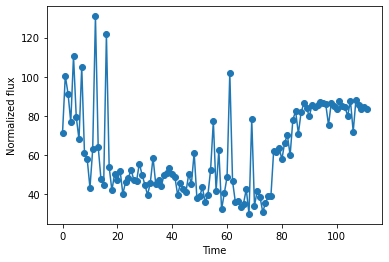

In [21]:
for i in range(N_images[0]):
     image_max[i] = np.max(images[i])
        
        
        
times = np.arange(len(image_max))  # assuming equal time intervals between images
plt.plot(times, image_max, 'o-')
plt.xlabel('Time')
plt.ylabel('Normalized flux')
plt.show()

Print the list of brightness values for all images 

In [26]:
print(image_max)

[ 71.43936767 100.5103405   91.42166665  76.83950792 110.56960387
  79.51167972  68.00372293 105.15296219  61.00281613  57.86015461
  43.22452688  62.87098549 130.91996324  64.23459931  47.93556442
  44.57037024 121.68247416  53.8972938   41.95736168  50.51202998
  47.01529852  51.995252    40.04897351  46.41971453  48.41715591
  52.47805405  47.20219813  46.73525306  55.62567427  50.02955095
  44.91911001  39.60159021  45.70713939  58.71232109  45.03609294
  47.49777146  44.08211824  49.66260989  50.96784525  53.18064988
  50.35222466  48.52388945  39.46288949  45.81096249  42.424751
  40.98980564  50.19334837  45.35755919  61.13807206  37.95366707
  38.86590845  43.42989785  36.15613263  39.36141731  52.51416106
  77.35361469  41.53720711  62.56278837  32.28333105  40.5144818
  48.7631222  102.12062056  46.66650282  36.21925622  36.65778195
  33.50192292  35.18821916  42.53391282  29.91399064  78.3129937
  34.10448405  41.80349971  38.74057883  30.95345539  35.31339545
  38.95944637 

In [32]:
import numpy as np
from astropy.io import fits

filepath = "Data/RZ_Cep/Light/Blue/"
search_pattern = "Reduced_star_Light_*.fits"

# Find the reduced images matching the search pattern
image_list = glob.glob(filepath + search_pattern)

# Load the reduced images
images = [fits.getdata(filename) for filename in image_list]

hdulist = fits.open(images)

# Loop over the HDUs in the FITS file
for i in range(len(hdulist)):
    # Get the image data
    image_data = hdulist[i].data
    
    # Find the brightest pixel
    brightest_pixel = np.unravel_index(np.argmax(image_data), image_data.shape)
    
    # Print the pixel position
    print("HDU", i+1, "brightest pixel position: ", brightest_pixel)

    # Save the pixel position as coordinates
    header = hdulist[i].header
    ra = header['CRVAL1'] + brightest_pixel[1]*header['CDELT1']
    dec = header['CRVAL2'] + brightest_pixel[0]*header['CDELT2']
    
    # Print the coordinates
    print("HDU", i+1, "RA: ", ra)
    print("HDU", i+1, "DEC: ", dec)

# Close the FITS file
hdulist.close()


OSError: File-like object does not have a 'write' method, required for mode 'ostream'.

In [28]:
import numpy as np
import astropy.io.fits as fits
from photutils import aperture_photometry, CircularAperture
import matplotlib.pyplot as plt
import glob

# Define the filepath and search pattern for the reduced images
filepath = "Data/RZ_Cep/Light/Blue/"
search_pattern = "Reduced_star_Light_*.fits"

# Find the reduced images matching the search pattern
image_list = glob.glob(filepath + search_pattern)

# Load the reduced images
images = [fits.getdata(filename) for filename in image_list]

# Define the position of the variable star in the images
for i in range(N_images[0]):
     image_max[i] = np.max(images[i])

# Define the radius of the circular aperture for photometry
aperture_radius = 5

# Extract the flux data for the variable star from each image
fluxes = []
for i, image in enumerate(images):
    position = positions[i]
    sources = detect_sources(image, 5, npixels=5)
    mask = sources.data == sources.data.max()
    segment_img = sources.data * mask
    aperture = CircularAperture(position, aperture_radius)
    phot_table = aperture_photometry(image, aperture, mask=segment_img)
    fluxes.append(phot_table['aperture_sum'][0])

# Normalize the flux data by dividing by a reference star
ref_flux = np.mean(fluxes)
normalized_fluxes = fluxes / ref_flux

# Plot the light curve
times = np.arange(len(normalized_fluxes))  # assuming equal time intervals between images
plt.plot(times, normalized_fluxes, 'o-')
plt.xlabel('Time')
plt.ylabel('Normalized flux')
plt.show()


IndexError: list index out of range

In [23]:
# Find the position of the brightest pixel in each image
positions = []
for image in images:
    sources = detect_sources(image, 5, npixels=5)
    brightest = np.argmax(sources.data)
    props = source_properties(image - sources, brightest + 1)
    positions.append((props.xcentroid.value, props.ycentroid.value))

# Define the radius of the circular aperture for photometry
aperture_radius = 5

# Extract the flux data for the variable star from each image
fluxes = []
for i, image in enumerate(images):
    position = positions[i]
    sources = detect_sources(image, 5, npixels=5)
    mask = sources.data == sources.data.max()
    segment_img = sources.data * mask
    aperture = CircularAperture(position, aperture_radius)
    phot_table = aperture_photometry(image, aperture, mask=segment_img)
    fluxes.append(phot_table['aperture_sum'][0])

# Normalize the flux data by dividing by a reference star
ref_flux = np.mean(fluxes)
normalized_fluxes = fluxes / ref_flux

# Plot the light curve
times = np.arange(len(normalized_fluxes))  # assuming equal time intervals between images
plt.plot(times, normalized_fluxes, 'o-')
plt.xlabel('Time')
plt.ylabel('Normalized flux')
plt.show()


        Use `~photutils.segmentation.SourceCatalog` instead. [warnings]


ValueError: segment_img and data must have the same shape.

In [ ]:
import numpy as np
import astropy.io.fits as fits
from photutils import aperture_photometry, CircularAperture, detect_threshold
from astropy.stats import sigma_clipped_stats
import matplotlib.pyplot as plt
import glob

# Define the filepath and search pattern for the reduced images
filepath = "Data/RZ_Cep/Light/Blue/"
search_pattern = "Reduced_star_Light_*.fits"

# Find the reduced images matching the search pattern
image_list = glob.glob(filepath + search_pattern)

# Load the reduced images
images = [fits.getdata(filename) for filename in image_list]

# Calculate the detection threshold for segmentation
_, median, std = sigma_clipped_stats(images, sigma=3.0)
threshold = detect_threshold(images, nsigma=5.0, background=median)

# Segment the images to identify the location of the star
positions = []
for image in images:
    sources = detect_sources(image, threshold, npixels=5)
    if len(sources) > 0:
        positions.append((sources[0].xcentroid.value, sources[0].ycentroid.value))
    else:
        positions.append((np.nan, np.nan))

# Define the radius of the circular aperture for photometry
aperture_radius = 5

# Extract the flux data for the variable star from each image
fluxes = []
for i, image in enumerate(images):
    if np.isnan(positions[i]).any():
        fluxes.append(np.nan)
    else:
        aperture = CircularAperture(positions[i], aperture_radius)
        phot_table = aperture_photometry(image, aperture)
        fluxes.append(phot_table['aperture_sum'][0])

# Normalize the flux data by dividing by a reference star
ref_flux = np.nanmean(fluxes)
normalized_fluxes = fluxes / ref_flux

# Plot the light curve
times = np.arange(len(normalized_fluxes))  # assuming equal time intervals between images
plt.plot(times, normalized_fluxes, 'o-')
plt.xlabel('Time')
plt.ylabel('Normalized flux')
plt.show()
